In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

In [4]:
with open('NBA_Matches_Stats.json') as f:
    data = json.load(f)

points = []
df = pd.DataFrame()
for d in data:
    for action in d["playByPlay"]["actions"]:
        if "Shot" in action['actionType']:
            if action["playerNameI"] == "S. Curry":
                df = pd.concat([df, pd.DataFrame(action, index=[0])], ignore_index=True)

df = df.rename(columns={"actionType": "Shot Type"})


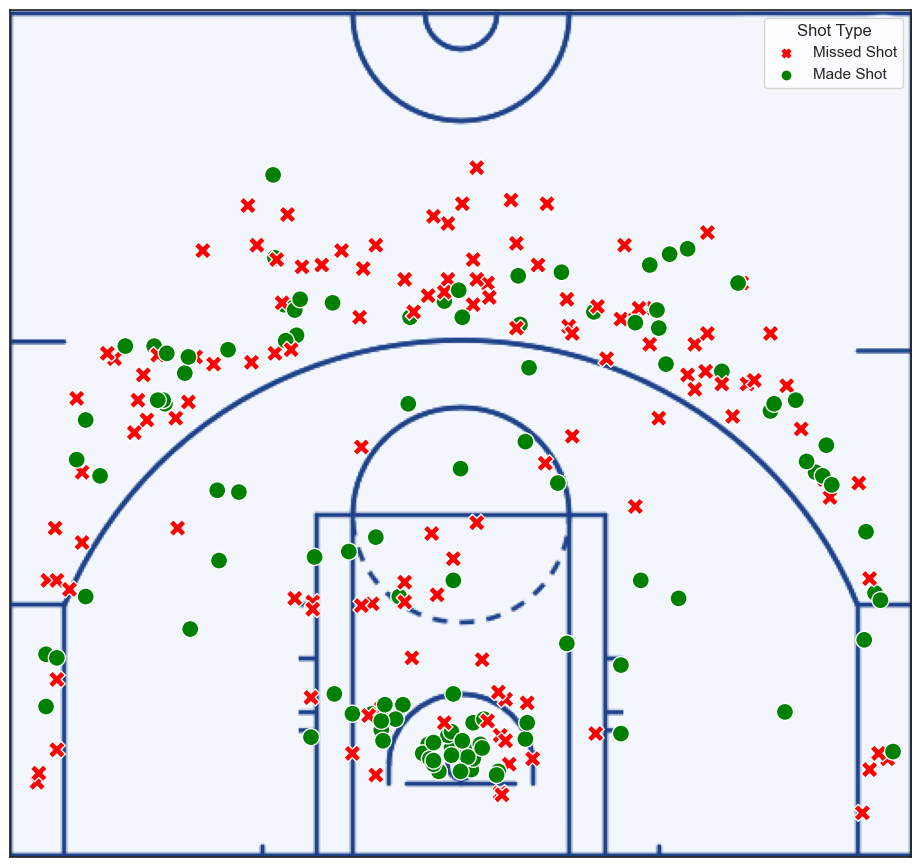

In [5]:
# change palette

img = plt.imread("court.png")
fig, ax = plt.subplots(figsize=(12, 11))
ax.imshow(img, extent=[-270, 270, -67.5, 442.5])
# plot the shots
sns.set_theme(style="white", palette="muted", color_codes=True)
sns.scatterplot(x="xLegacy", y="yLegacy", data=df, hue="Shot Type", style="Shot Type", s=150, legend=True,
                palette=["red", "green"], style_order=["Made Shot", "Missed Shot"])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)

plt.show()